# Calculating a stray field using an airbox method

In order to calculate the stray field outside the sample, we have to define an "airbox" which is going to contain our sample. In this example we define a box with 100 nm edgle length as a mesh which then contains a magnetic sample which is a cube with 50 nm dimensions. We achieve this by implementing a Python fuction for defining the Ms (`norm_fun`). Outside our sample the value of saturation magnetisation is zero.

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

region = df.Region(p1=(-100e-9, -100e-9, -100e-9), p2=(100e-9, 100e-9, 100e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

def norm_fun(pos):
    x, y, z = pos
    if -50e-9 <= x <= 50e-9 and -50e-9 <= y <= 50e-9 and -50e-9 <= z <= 50e-9:
        return 8e5
    else:
        return 0

system = mm.System(name='airbox_method')
system.energy = mm.Exchange(A=1e-12) + mm.Demag()
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=1)
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=norm_fun)

We can now plot the norm to confirm our definition.

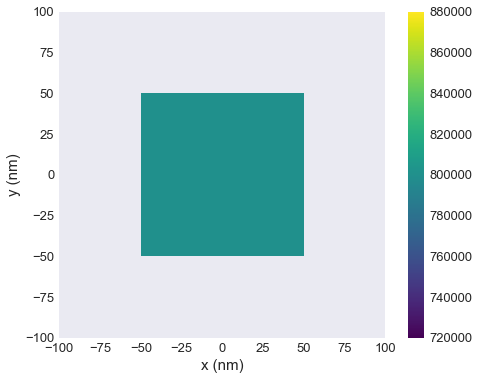

In [2]:
system.m.norm.plane('z').mpl()

In the next step, we can relax the system and show its magnetisation.

Running OOMMF (ExeOOMMFRunner)[2022/02/25 18:06]... (7.5 s)


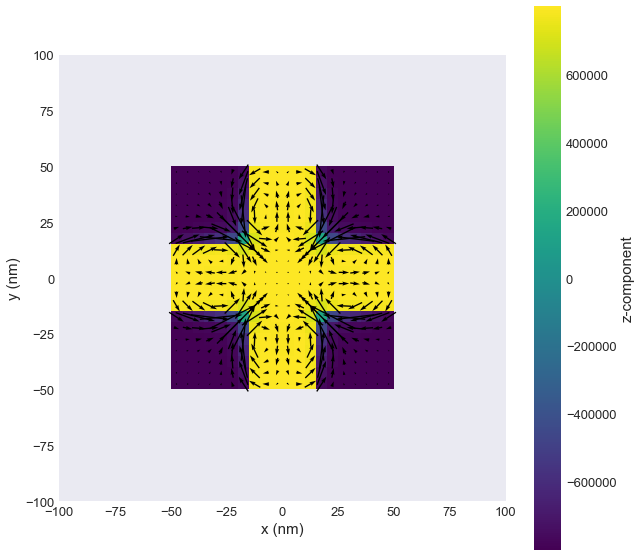

In [3]:
md = oc.MinDriver()
md.drive(system)

system.m.plane('z').mpl(figsize=(10, 10))

Stray field can now be calculated as an effective field for the demagnetisation energy.

In [4]:
stray_field = oc.compute(system.energy.demag.effective_field, system)

Running OOMMF (ExeOOMMFRunner)[2022/02/25 18:06]... (1.1 s)


`stray_field` is a `df.Field` and all operations characteristic to vector fields can be performed.

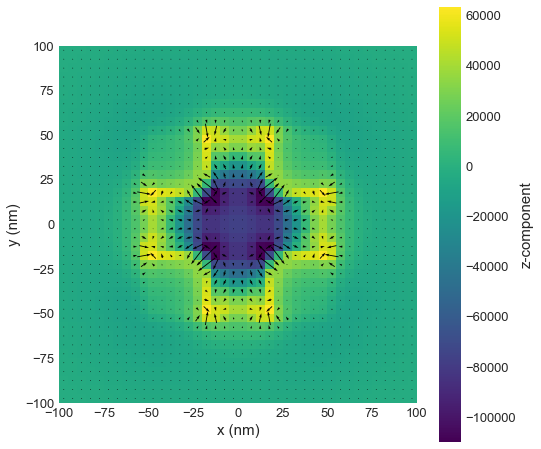

In [5]:
stray_field.plane('z').mpl(figsize=(8, 8), vector_kw={'scale': 1e6})